<img src="images/bannerlandbouw.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>WAT IS OBJECTDETECTIE?</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
Object detectie systemen worden tegenwoordig al op heel wat plaatsen gebruikt in de hedendaagse maatschappij. Ook al worden object detectie systemen al veel gebruikt, toch zijn er nog heel wat verbeteringen mogelijk. <br>    
    In deze notebook komen we wat meer te weten over de werking van een objectdetectie systeem. Objectdetectie kan worden gedefinieerd als een computervisietechniek die tot doel heeft objecten op een afbeelding of video te identificieren en te lokaliseren. Deze techniek wordt bijvoorbeeld vaak gebruikt bij het oplossen van een misdrijf bij de politie. Een computersysteem kan namelijk veel sneller werken dan een mens. Maar toch is het niet zo eenvoudig voor een computer om een object op afbeelding te herkennen, dit komt doordat de computer binair werkt. Een computer zal dus geen afbeelding te zien krijgen zoals wij die zien maar wel allemaal cijfertjes (zie figuur hieronder). Een afbeelding bestaat uit pixels iedere pixel heeft een bepaalde kleur, dit kleur kan worden voorgesteld als een cijfer. Doordat een computer dus met cijfers werkt zal het moeilijker zijn voor een computer om een voorwerp te herkennen dan voor het menselijk oog. 
</div>

<table><tr>
<td><figure>
  <img src="images/beeldcomputer.jpg" alt="Trulli" width="400"/>
   <center>Wat een computer ziet [1]</center> 
    </figure></td>
<td><figure>
  <img src="images/watcomputerziet.png" alt="Trulli" width="400">
  <center>Wat een computer ziet [4]</center>
</figure></td>
    
</tr></table>

 <p> Voorbeelden van waar objectiedetectie algoritmen worden ingezet: [4]</p>
<ul>
  <li>Zelfrijdende auto's</li>
    Als je zelf met de auto rijdt moet je met heel wat zaken rekeninghouden. Voorbeelden hiervan zijn overstekende personen, verkeersborden, andere auto's,... Ook een zelfrijdende wagen moet deze zaken detecteren, daarvoor worden dus objectdetectiealgoritmen gebruikt. 
  <li>Camerabewaking</li>
    Dankzij realtime objectdetectie en het volgen van de bewegingen van objecten kunnen videobewakingscamera's de opname van scènes van een bepaalde locatie, zoals een luchthaven, volgen. Deze ultramoderne techniek gebruik en lokaliseert verschillende instanties van een bepaald object in de video. In realtime, als het object door een bepaalde scène van over het specifieke frame beweegt, slaat het systeem de informatie op met realtime trackingfeeds.
   <li>Crowd counting</li>
    Het tellen van het aantal mensen kan handig zijn in grote gebouwen zoals winkelcentra, maar ook in pretparken kan het goed zijn om te weten hoeveel mensen er aanwezig zijn. Dit is dan vooral belangrijk voor druktes te vermijden, maar ook voor de veiligheid in noodsituaties. 
    <li>Medische sector</li>
    Doordat veel microscopen digitaal zijn, is het makkelijker geworden om ook in deze sector beeldherkenning te gaan gebruiken en zo het werk van onderzoekers te gaan verlichten. Er kan ook met beeldherkenning gekeken worden of er bepaalde weefsels of structuren te vinden zijn in het menselijk lichaam die daar niet thuishoren en zo ziektes of gezwellen opsporen. Met de opkomst van corona werd het belangrijk om snel na ta gaan of mensen koorts hadden, ook dit kan via AI vastgesteld worden op een warmtecamera.
    <li>Landbouw</li>
    In de landbouw kan objectdetectie ingezet worden bij het verwijderen van onkruid. Zo kan het systeem onkruid van gewassen scheiden via beeldherkenning om daarna het onkruid te verwijderen en de gewassen te laten staan.
    <li>Voetbal</li>
    In de voetbal kan objectdetectie ingezet worden om sneller hoogtepunten van een voetbalwedstrijd te verzamelen en te compileren tot een nieuwsbericht. Het kan ook gebruikt worden om bijvoorbeeld buitenspel van de spelers na te gaan. 
    <li>Vertalingen</li>
    Objectdetectie wordt ook al ingezet om dingen te vertalen. Zo kan je al via bepaalde apps met het in beeld brengen van een bord in een andere taal, dit automatisch naar je eigen taal zetten. 
</ul>

Welk object zie je op volgende figuur?[5]

  <img src="images/afbeelding1.jpg" alt="Trulli" width="200">


Antwoord: 

Welk object zie je op volgende figuur?[5]

  <img src="images/afbeelding2.jpg" alt="Trulli" width="200">


Antwoord: 

<div class="alert alert-box alert-success">
<p>Op beide figuren is hetzelfde voorwerp zichtbaar, maar op de tweede figuur is het voorwerp 90 graden gedraaid. Waarom detecteren we de eerste afbeelding niet als een liggend persoon? Misschien omdat we de link leggen met de straat die zichtbaar is op de figuur? Terwijl het voor ons vanzelfsprekend is om objecten te linken aan de omgeving en de context waar deze zich in bevinden, is dit voor een algoritme veel complexer. Hierin bevindt zich dus nog een moeilijkheid bij het detecteren van objecten.  </p>
</div>

In deze notebook gaan we een algoritme bekijken die wiskundige vormen kan herkenen. Objectdetectie kan op veel verschillende manieren worden uit gevoerd, hier zal er één van de technieken besproken worden.

<div>
    <font color=#690027 markdown="1">
        <h2>1. Bibliotheken inladen</h2> 
    </font>
</div>

<div class="alert alert-block alert-warning"> 
<p>We zullen gebruik maken van een bibliotheek. Bibliotheken zijn reeds voorgeprogrammerde functies die kunnen gebruikt worden. We gaan hier dus gebruik maken van deeltjes code die reeds bestaan, zo maken we het programmeren voor onszelf eenvoudiger. OpenCV-Python is een bibliotheek ontworpen om computervisieproblemen op te lossen.[2]</p>
</div>

In [1]:
#installeren van de bibliotheek opencv
!pip install opencv-python

In [2]:
#inladen nodige bibliotheken
import cv2
import numpy as np
from matplotlib import pyplot as plt

<div>
    <font color=#690027 markdown="1">
        <h2>2. Foto inladen</h2> 
    </font>
</div>

<p>Om het objectiedetectiealgoritme te laten werken hebben we een afbeelding nodig, voor dit notebook heb je de afbeelding shapes.png ter beschikking. In het stuk code hieronder werd een functie geschreven om de afbeelding weer te geven. Een functie is een klein blok van een programma dat een aantal instructies bevat om een specifieke taak uit te voeren, hier dus het weergeven van de afbeelding. Om de functie effectief uit te voeren roep je deze in je programma dan op. Bekijk de afbeelding en kijk welke figuren jij op de afbeelding kan herkennen.</p>

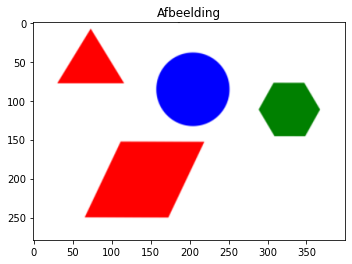

In [4]:
#functie om een afbeelding weer te geven
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

# inlezen afbeelding
img = cv2.imread("images/shapes.png")

# oproepen van de functie plt_show
plt_imshow("Afbeelding", img)

Welke wiskundige figuren herken je? 

<p>Denk voor jezelf na hoe je te werk bent gegaan om de vormen te herkennen. Wat zijn de eigenschappen van de vormen waarop je gelet hebt? </p>

<div>
    <font color=#690027 markdown="1">
        <h2>3. Hoe zal een algoritme werken?</h2> 
    </font>
</div>

<p>Het algoritme zal ook aan de hand van eigenschappen werken. Wij denken hier niet zo diep meer bij na maar het is doordat we bepaalde eigenschappen hebben aangeleerd dat het herkennen van de figuren zo vlot verloopt. Zo herkennen we de figuren aan de hand van het aantal hoeken, aan het aantal evenwijdige zijden,...  De computer zal op een gelijkaardige manier proberen de figuren te herkennen. Wij kunnen de eigenschappen makkelijk zien op het eerste zicht algoritme, bij een computer zal dit niet gaan. De computer zal de afbeelding op een bepaalde manier gaan manipuleren. Dit algoritme zal de randen van de verschillende figuren zoeken. Een afbeelding heeft meestal heel wat verschillende kleuren, voor de computer zijn dit een heleboel verschillende cijfertjes, om dit te beperken zal de computer de afbeelding omzetten naar een zwart-wit afbeelding. Door de pixel waardes om te zetten naar zwart of wit zal het verschil veel duidelijker worden, want wit zal een heel hoge pixelwaarde hebben en zwart een zeer lage pixelwaarde. [3]</p>

<p>Om het verschil duidelijk te maken zullen we gebruik maken van een figuur waar enkel een driehoek op afgebeeld staat. Run de volgende code en kijk in de matrix of je de driehoek kan herkennen.</p>

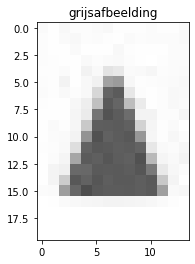

[[250 254 248 252 252 250 248 253 253 253 251 253 253 249]
 [252 254 250 248 252 251 253 254 250 252 251 251 251 249]
 [252 254 254 250 254 254 254 248 253 254 254 254 251 251]
 [252 253 254 254 249 252 250 249 252 254 255 253 251 251]
 [253 253 251 254 242 249 227 232 250 249 246 252 251 250]
 [252 253 243 254 248 241 162 155 247 253 252 251 250 248]
 [251 253 249 252 248 215 100  91 231 252 254 252 248 249]
 [253 254 254 247 238 192  89 101 189 235 254 252 248 250]
 [254 254 254 245 235 116  83  92 109 243 243 252 252 245]
 [254 250 253 246 201  94  93  91  96 210 245 253 250 255]
 [254 251 250 243 147  81  97  92  88 151 246 253 247 252]
 [253 252 249 222  98  88  90  94  92  99 231 249 251 246]
 [254 251 245 166  91  95  86  93  96  81 185 245 249 243]
 [254 244 240 105 104  90  91  90  93  86 121 233 247 251]
 [254 244 204  88  98  86  94  90  90  94  89 200 244 254]
 [251 250 157 102  77  89  92  92  91  94  90 159 249 247]
 [255 254 250 248 246 245 243 243 244 245 247 250 253 25

In [5]:
image = cv2.imread("images/driehoek.JPG")
graydriehoek = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("grijsafbeelding", graydriehoek)
print(graydriehoek)

<p>Je merkt op dat de vorm nu donker en duidelijk zichtbaar is. Daarna zal er een drempelwaarde (treshold) op de afbeelding worden geplaatst. Een threshold of drempelwaarde is een waarde die wordt ingesteld zodat de belangrijkste pixels (de pixels van de vormen) meer uitkomen. Door deze drempelwaarde zal het voor de computer duidelijk worden wat de achtergrond is en wat de figuur, zo kan de rand van de figuren bepaald worden. Run de code hieronder, je ziet nu in de binaire afbeelding duidelijk de driehoek staan. </p>

In [6]:
# instellen drempelwaarde
#alle pixel waarden die kleiner zijn dan 127 worden op nul gezet al degene groter op 255
_, threshold = cv2.threshold(graydriehoek, 127, 255, cv2.THRESH_BINARY)
print(threshold)


[[255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 255 255 255 255 255 255]
 [255 255 255 255 255   0   0   0   0 255 255 255 255 255]
 [255 255 255 255 255   0   0   0   0 255 255 255 255 255]
 [255 255 255 255 255   0   0   0   0 255 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0 255 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 25

<p>Opdracht: schrijf nu zelf een stukje code die de afbeelding met alle wiskundigefiguren (shapes.png) omzet naar grijswaarden en daar een treshold op toepast.  </p>

In [7]:
# functie die de randen zoekt
#cv2. RETR_TREE vindt alle contourlijnen en rangschikt ze, met de buitenste contouren bovenaan in de lijst
#cv2. CHAIN_APPROX_SIMPLE retourneert punten die nodig zijn voor het tekenen van de contourlijn
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  

<p>Als laatste zal er dan een functie aan de hand van de randen het aantal hoeken bepalen. Het algoritme basseert zich dus op het aantal hoeken van de figuur om een naam aan de figuur toe te kennen. </p>

In [8]:
i = 0
# een lijst om alle vormnamen op te slaan
for contour in contours:
  
    # findcontour detecteert hele afbeelding als een vorm
    if i == 0:
        i = 1
        continue
  
    # functie om de vorm te benaderen
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # functie om een rand rond elke vorm te tekenen
    # -1, zorgt dat alle contouren getekent worden, 255 voor groene kleur, 5 lijndikte
    cv2.drawContours(img, [contour],-1, (0,255, 0), 5)
  
    # zoekt het centrum van de vorm
    M = cv2.moments(contour)
    if M["m00"] != 0.0:
        x = int(M["m10"]/M["m00"])-35
        y = int(M["m01"]/M["m00"])
  
    # Zet de naam van de vorm op het centrum
    if len(approx) == 3:
        cv2.putText(img, "driehoek", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  
    elif len(approx) == 4:
        cv2.putText(img, "parallellogram", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  
    elif len(approx) == 5:
        cv2.putText(img, "vijfhoek", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  
    elif len(approx) == 6:
        cv2.putText(img, "zeshoek", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  
    else:
        cv2.putText(img, "cirkel", (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  


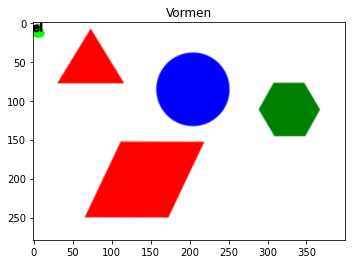

In [9]:
# weergeven van de afbeelding met de namen van de vorm
plt_imshow("Vormen", img)

<p>Dit is één voorbeeld van een detectiealgoritme er zijn er natuurlijk heel veel en bepaalde die ook beter werken dan andere. Detectiealgoritmes zijn ook belangrijk geworden in de huidige samenleving, zoals in het begin al werd aangegeven. <p/>
   

### Referenties

<p>[1] Spirina, K. (2021, 10 juni). How Does Computer Vision Work and What It Gives Technology-Led Industries. InData Labs. Geraadpleegd op 16 januari 2022, van https://indatalabs.com/blog/how-does-computer-vision-work</p>
<p>[2] OpenCV: Introduction to OpenCV-Python Tutorials. (2013). opencv. Geraadpleegd op 19 november 2022, van https://docs.opencv.org/4.x/d0/de3/tutorial_py_intro.html</p>
<p>[3] Rath, S. (2021, 18 oktober). Contour Detection using OpenCV (Python/C++). LearnOpenCV – OpenCV, PyTorch, Keras, Tensorflow Examples and Tutorials. Geraadpleegd op 16 januari 2022, van https://learnopencv.com/contour-detection-using-opencv-python-c/</p>
<p>[4] Insight, A. (2021, 4 juli). Beginner’s Guide to Object Detection for Computer Vision Project. Analytics Insight. Geraadpleegd op 16 januari 2022, van https://www.analyticsinsight.net/beginners-guide-to-object-detection-for-computer-vision-project/</p>
<p>[4](2020). Computer Vision tasks: Image classification, localization, etc | CommonLounge. commonlounge. Geraadpleegd op 17 januari 2022, van https://www.commonlounge.com/discussion/c9975025c9ff473c8f9ed2c4b1c3ea6a<p>
<p>[5] Oyen, S. (2020, 1 september). Computer visie: hoe analyseert een algoritme jouw beeldmateriaal? EUKA. Geraadpleegd op 20 maart 2022, van https://euka.flandersmake.be/computer-vision-hoe-analyseert-een-algoritme-jouw-beeldmateriaal/</p>


<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook AI in de Landbouw, zie <a href="http://www.aiopschool.be">AI Op School</a>, van M. Benoit, F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 